# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [559]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


In [560]:
%pip install numpy
%pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [561]:
%pip install plotly-express
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Import Statements

In [562]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import nbformat

from collections import Counter

## Notebook Presentation

In [563]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [564]:
df_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

### df_income

In [565]:
df_income_shape = df_income.shape
print(f"df_income shape: {df_income_shape}.")
print(f"df_income has {df_income_shape[0]} rows and {df_income_shape[1]} columns.")
print(f"df_income has the following columns:\n{list(df_income.columns)}")
print(f"There are NaN values in df_income: {df_income.isna().values.any()}.")
print(f"There are duplicates in df_income: {df_income.duplicated().values.any()}.")

df_income shape: (29322, 3).
df_income has 29322 rows and 3 columns.
df_income has the following columns:
['Geographic Area', 'City', 'Median Income']
There are NaN values in df_income: True.
There are duplicates in df_income: False.


### df_poverty

In [566]:
df_poverty_shape = df_poverty.shape
print(f"df_poverty shape: {df_poverty_shape}.")
print(f"df_poverty has {df_poverty_shape[0]} rows and {df_poverty_shape[1]} columns.")
print(f"df_poverty has the following columns:\n{list(df_poverty.columns)}")
print(f"There are NaN values in df_poverty: {df_poverty.isna().values.any()}.")
print(f"There are duplicates in df_poverty: {df_poverty.duplicated().values.any()}.")

df_poverty shape: (29329, 3).
df_poverty has 29329 rows and 3 columns.
df_poverty has the following columns:
['Geographic Area', 'City', 'poverty_rate']
There are NaN values in df_poverty: False.
There are duplicates in df_poverty: False.


### df_completed_hs

In [567]:
df_completed_hs_shape = df_completed_hs.shape
print(f"df_completed_hs shape: {df_completed_hs_shape}.")
print(f"df_completed_hs has {df_completed_hs_shape[0]} rows and {df_completed_hs_shape[1]} columns.")
print(f"df_completed_hs has the following columns:\n{list(df_completed_hs.columns)}")
print(f"There are NaN values in df_completed_hs: {df_completed_hs.isna().values.any()}.")
print(f"There are duplicates in df_completed_hs: {df_completed_hs.duplicated().values.any()}.")

df_completed_hs shape: (29329, 3).
df_completed_hs has 29329 rows and 3 columns.
df_completed_hs has the following columns:
['Geographic Area', 'City', 'percent_completed_hs']
There are NaN values in df_completed_hs: False.
There are duplicates in df_completed_hs: False.


### df_share_race

In [568]:
df_share_race_shape = df_share_race.shape
print(f"df_share_race shape: {df_share_race_shape}.")
print(f"df_share_race has {df_share_race_shape[0]} rows and {df_share_race_shape[1]} columns.")
print(f"df_share_race has the following columns:\n{list(df_share_race.columns)}")
print(f"There are NaN values in df_share_race: {df_share_race.isna().values.any()}.")
print(f"There are duplicates in df_share_race: {df_share_race.duplicated().values.any()}.")

df_share_race shape: (29268, 7).
df_share_race has 29268 rows and 7 columns.
df_share_race has the following columns:
['Geographic area', 'City', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
There are NaN values in df_share_race: False.
There are duplicates in df_share_race: False.


### df_fatalities

In [569]:
df_fatalities_shape = df_fatalities.shape
print(f"df_fatalities shape: {df_fatalities_shape}.")
print(f"df_fatalities has {df_fatalities_shape[0]} rows and {df_fatalities_shape[1]} columns.")
print(f"df_fatalities has the following columns:\n{list(df_fatalities.columns)}")
print(f"There are NaN values in df_fatalities: {df_fatalities.isna().values.any()}.")
print(f"There are duplicates in df_fatalities: {df_fatalities.duplicated().values.any()}.")

df_fatalities shape: (2535, 14).
df_fatalities has 2535 rows and 14 columns.
df_fatalities has the following columns:
['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera']
There are NaN values in df_fatalities: True.
There are duplicates in df_fatalities: False.


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [570]:
df_income['Median Income'] = df_income['Median Income'].fillna(0)
df_income['Median Income'].isna().values.any()

False

In [571]:
df_fatalities['armed'].fillna('unknown', inplace=True)
df_fatalities['age'].fillna(0, inplace=True)
df_fatalities['race'].fillna('unknown', inplace=True)
df_fatalities['flee'].fillna('unknown', inplace=True)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [572]:
df_poverty['poverty_rate'] = df_poverty['poverty_rate'].str.replace('-', '0')
df_poverty['poverty_rate'] = df_poverty['poverty_rate'].map(lambda x: x + '0' if x == '' else x)

In [573]:
df_poverty['poverty_rate_float'] = df_poverty['poverty_rate'].map(lambda x: float(x))
poverty_rate_state = df_poverty.groupby('Geographic Area')['poverty_rate_float'].mean().reset_index().sort_values('poverty_rate_float', ascending=False)

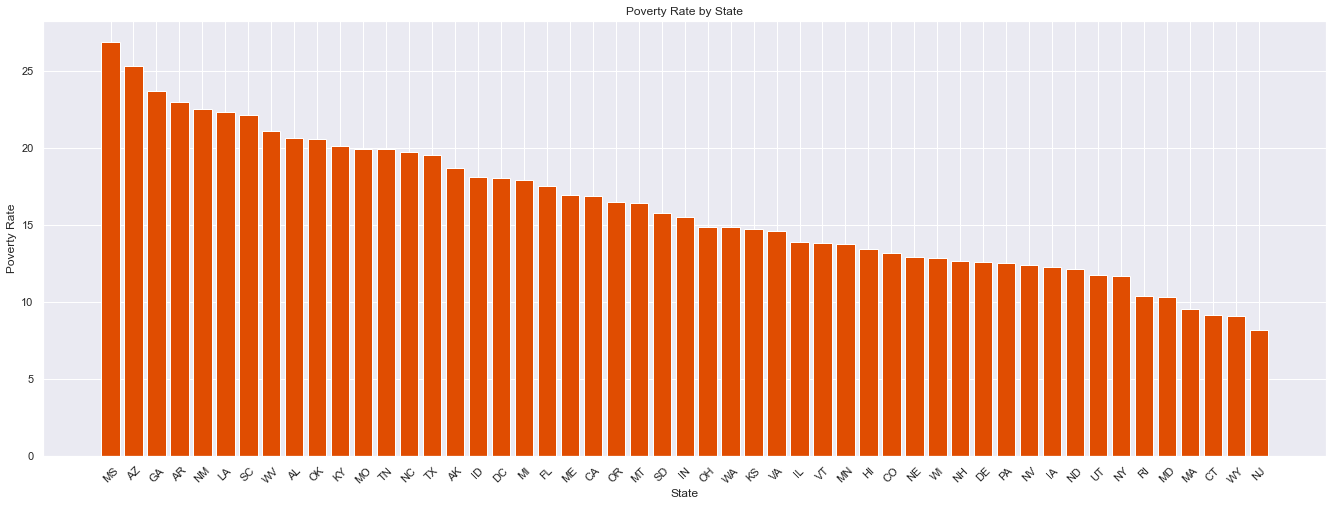

In [574]:
fig, ax = plt.subplots(figsize=(23, 8))
ax.bar(x=poverty_rate_state['Geographic Area'], height=poverty_rate_state['poverty_rate_float'], color='#E04D01')
ax.set(title='Poverty Rate by State',
        xlabel='State',
        ylabel='Poverty Rate'
        )

plt.setp(ax.get_xticklabels(), rotation = 45)
plt.show()

#### Mississippi has the highest poverty rate and New Jersey has the lowest poverty rate.

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [575]:
df_completed_hs['percent_completed_hs'] = df_completed_hs['percent_completed_hs'].str.replace('-', '0')
df_completed_hs['percent_completed_hs'] = df_completed_hs['percent_completed_hs'].str.replace(' ', '0')

In [576]:
df_completed_hs['percent_completed_hs'] = df_completed_hs['percent_completed_hs'].map(lambda x: float(x))
completed_hs_rate = df_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().reset_index().sort_values('percent_completed_hs', ascending=False)

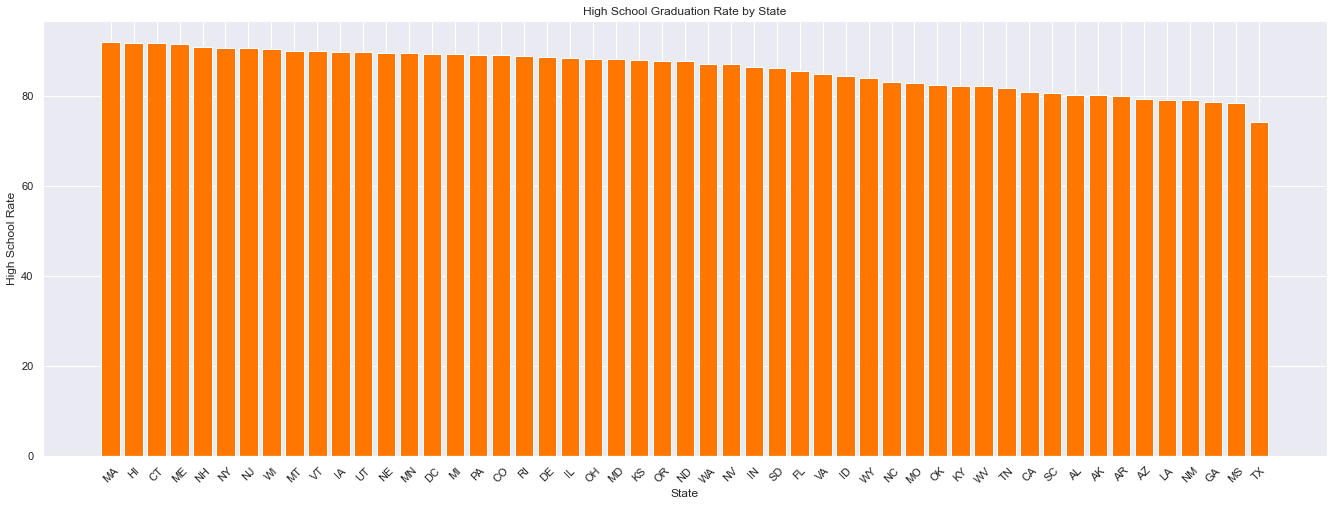

In [577]:
fig, ax = plt.subplots(figsize=(23, 8))
ax.bar(x=completed_hs_rate['Geographic Area'], height=completed_hs_rate['percent_completed_hs'], color='#FF7700')
ax.set(title='High School Graduation Rate by State',
        xlabel='State',
        ylabel='High School Rate'
        )

plt.setp(ax.get_xticklabels(), rotation = 45)
plt.show()

#### Texas has the lowest High School graduation rate and Massachusetts has the highest High School graduation rate

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [578]:
poverty_rate_state = poverty_rate_state.sort_values('Geographic Area', ascending=True)
completed_hs_rate = completed_hs_rate.sort_values('Geographic Area', ascending=True)

poverty_grad_rate_by_state = pd.merge(left=poverty_rate_state, right=completed_hs_rate, how='left', left_on='Geographic Area', right_on='Geographic Area')
poverty_grad_rate_by_state = poverty_grad_rate_by_state.sort_values('poverty_rate_float', ascending=False)


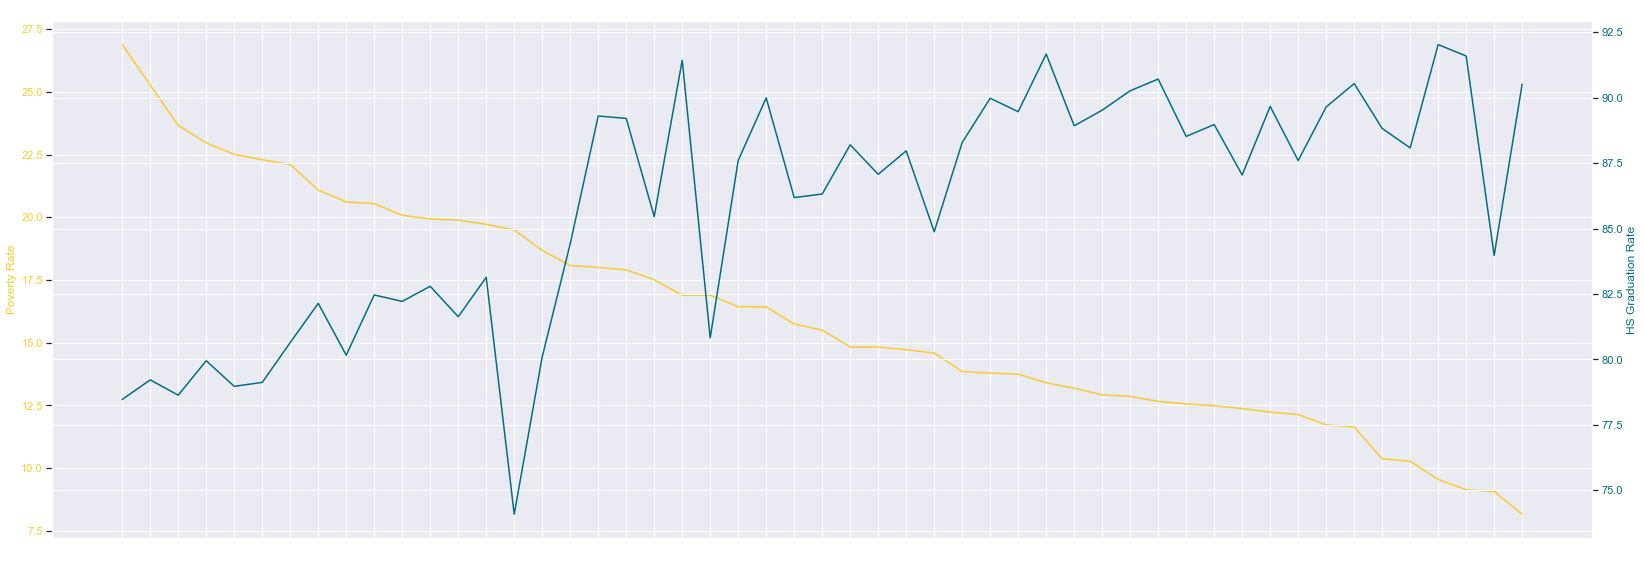

In [579]:

fig, ax1 = plt.subplots(figsize=(23, 8))

ax1.set_xlabel('State', color='white')
ax1.set_ylabel('Poverty Rate', color='#F8CB2E')
ax1.plot(poverty_grad_rate_by_state['Geographic Area'], poverty_grad_rate_by_state['poverty_rate_float'], color='#F8CB2E')
ax1.tick_params(axis='y', labelcolor='#F8CB2E')
ax1.tick_params(axis='x', labelcolor='white')

ax2 = ax1.twinx()

ax2.set_ylabel('HS Graduation Rate', color='#006E7F')
ax2.plot(poverty_grad_rate_by_state['Geographic Area'], poverty_grad_rate_by_state['percent_completed_hs'], color='#006E7F')
ax2.tick_params(axis='y', labelcolor='#006E7F')

fig.tight_layout()
plt.title('Poverty Rate vs. HS Graduation Rate per State', color='white')
plt.setp(ax1.get_xticklabels(), rotation = 45, color='white')
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

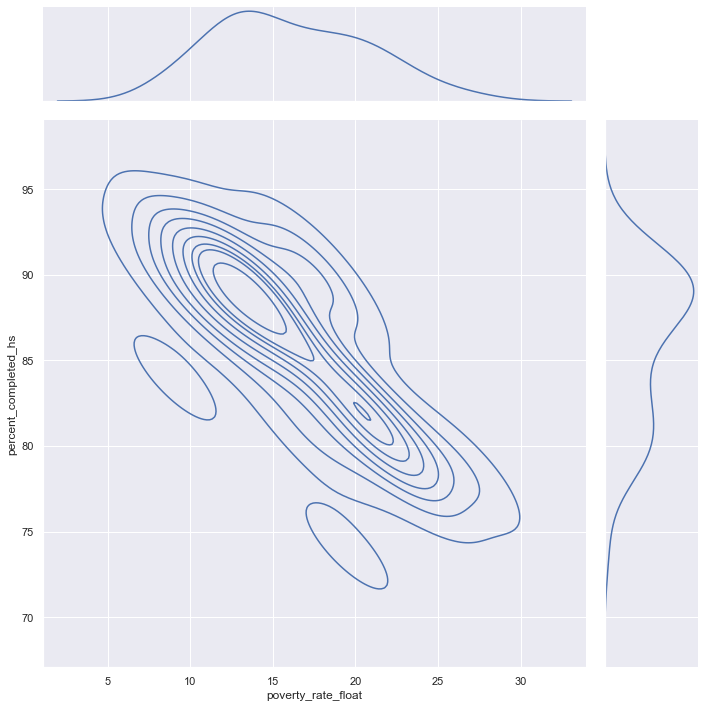

In [580]:
sns.jointplot(data=poverty_grad_rate_by_state, x='poverty_rate_float', y='percent_completed_hs', kind="kde", height=10)

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

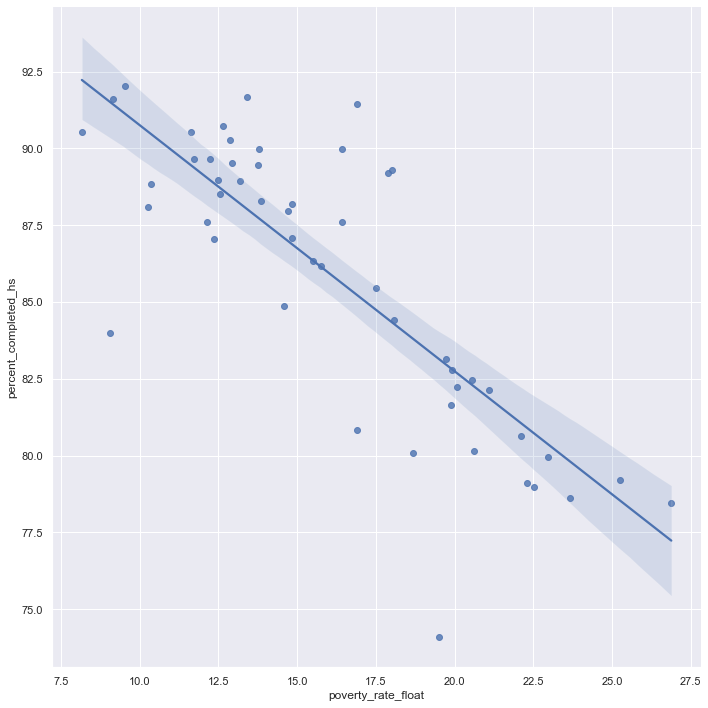

In [581]:
sns.lmplot(data=poverty_grad_rate_by_state, x='poverty_rate_float', y='percent_completed_hs', height=10)

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [582]:
df_share_race

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.9,0,0,2.1,0
29264,WY,Worland city,89.9,0.3,1.3,0.6,16.6
29265,WY,Wright town,94.5,0.1,1.4,0.2,6.2
29266,WY,Yoder town,97.4,0,0,0,4


In [583]:
race_share_state = pd.read_csv('race_share_state_updated.csv', encoding="windows-1252")


In [584]:
fig = px.bar(race_share_state, x="Geographic area", y=["perc_white", "perc_black", "perc_native_american", "perc_asian", "perc_hispanic"],
            title="Race Percentage by State", width=1400, height=700,
            labels={"variable": "race",  "Geographic area": "State", "value": "share"},
            template="ggplot2"
            )
fig.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [783]:
fatalities_by_race = df_fatalities['race'].value_counts().reset_index()


In [586]:
races = ['White', 'Black', 'Hispanic', 'Unknown', 'Asian', 'Native American', 'Other']
fig = px.pie(fatalities_by_race, values='race', names=races, title='Fatalities by Race',
                    hole=0.3, width=1400, height=700,
            labels={"label": "Race",  "race": "deaths"},
            template="ggplot2")
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [784]:
fatalities_by_sex = df_fatalities['gender'].value_counts().reset_index()


In [589]:
fig = px.pie(fatalities_by_sex, values='gender', names=['Male', 'Female'], title='Fatalities by Sex',
                    hole=0.5, width=1300, height=500,
            labels={"label": "Race",  "gender": "deaths"},
            template="ggplot2")
fig.show()

# Create a Box Plot Showing the Age by Sex

In [590]:
fig = px.box(df_fatalities, x="gender", y="age", title='Age of Death by Sex',
            width=1300, height=500,
            template="ggplot2")
fig.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [785]:
df_fatalities_2 = df_fatalities.copy()

In [592]:
df_armed = df_fatalities_2['armed'].value_counts().reset_index()
fig = px.pie(df_armed, values='armed', names='index', title='Armed with:',
                    hole=0.0, width=1400, height=900,
            labels={"index": "weapon",  "num of deaths": "deaths"},
            template="ggplot2")

fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

In [593]:
guns = 0
unarmed = 0
unknown = 0
for i, row in df_armed.iterrows():
    if 'gun' in row['index']:
        guns += row['armed']
    elif 'unarmed' in row['index']:
        unarmed += row['armed']
    elif 'unknown' in row['index'] or 'undetermined' in row['index']:
        unknown += row['armed']

df_guns_unarmed = pd.DataFrame(data={
    'gun': int(guns),
    'unarmed': int(unarmed),
    'unknown': int(unknown),
    },
    index= [0])

df_guns_unarmed = df_guns_unarmed.pivot_table(columns='index').reset_index()
df_guns_unarmed = df_guns_unarmed.rename(columns={'level_0': 'armed', 'index': 'num_deaths'})

In [594]:
fig = px.pie(df_guns_unarmed, values='num_deaths', names='armed', title='Armed Vs. Unarmed',
                    hole=0.0, width=1300, height=600,
            labels={"index": "weapon",  "num of deaths": "deaths"},
            template="ggplot2")

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [595]:
df_under_25 = df_fatalities[(df_fatalities['age'] <= 25) & (df_fatalities['age'] > 0)]
print(f"Roughly {(round(df_under_25.shape[0]/df_fatalities.shape[0],4)) * 100}% of peopled killed here 25 or younger")

Roughly 21.81% of peopled killed here 25 or younger


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

In [596]:
fig = px.histogram(df_fatalities, x="age", width=1300, height=500, title="Age of Fatalities", template="ggplot2")

fig.show()

Text(0.5, 1.0, 'Age of Death KDE')

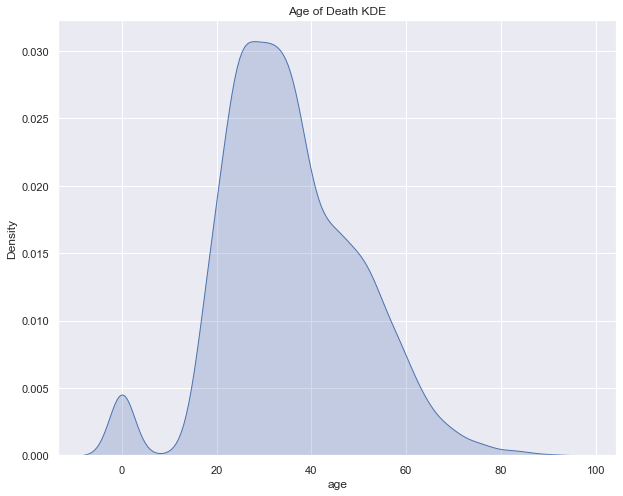

In [597]:
kde1 = sns.set(rc={'figure.figsize':(10,8)})
kde1 = sns.kdeplot(data=df_fatalities, x='age', fill=True, bw_adjust=0.9)
kde1.set_title('Age of Death KDE')


Text(0.5, 1.0, 'Age of Death by Race KDE')

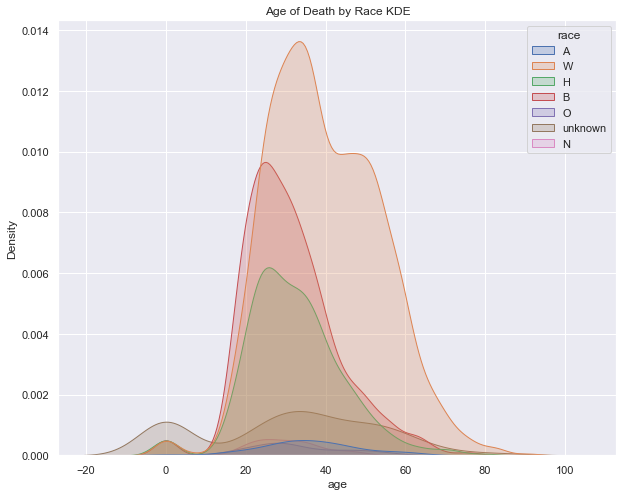

In [598]:
kde2 = sns.set(rc={'figure.figsize':(10,8)})
kde2 = sns.kdeplot(data=df_fatalities, x='age', hue='race', fill=True, bw_adjust=0.9)
kde2.set_title('Age of Death by Race KDE')


# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [599]:
df_total_by_race = df_fatalities.groupby('race').count().reset_index()

In [600]:
fig = px.pie(df_total_by_race, values='id', names='race', title='Total Killed by Race',
                    hole=0.0, width=1300, height=600,
            labels={"id": "total killed"},
            template="ggplot2")


fig.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [786]:
df_mental_illness = df_fatalities.groupby('signs_of_mental_illness').count().reset_index()

In [602]:
fig = px.pie(df_mental_illness, values='id', names='signs_of_mental_illness', title='Signs of Mental Illness Present',
                    hole=0.0, width=1300, height=600,
            labels={"id": "total killed", 'signs_of_mental_illness': 'mental illness'},
            template="seaborn")

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [787]:
df_cities = df_fatalities.groupby(['city', 'state']).count().reset_index()
df_cities['city_state'] = df_cities['city'] + ', ' + df_cities['state']
df_cities_top = df_cities.nlargest(10, columns='id')

In [604]:
fig = px.pie(df_cities_top, values='id', names='city_state', title='10 Cities With the Most Deaths',
                    hole=0.0, width=1300, height=600,
            labels={"id": "total killed", 'city_state': 'city'},
            template="ggplot2")

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [670]:
df_state = df_fatalities.groupby('state').count().reset_index()


In [667]:
fig = px.choropleth(df_state, geojson=df_state['id'], locations=df_state['state'], locationmode='USA-states',
                            color=df_state['id'],
                           color_continuous_scale=px.colors.sequential.YlGn,
                           scope="usa",
                           labels={'state': 'State', 'id': 'Number of Deaths'}
                          )

fig.update_layout(
    title_text = 'Deaths per State')

fig.show()

In [675]:
df_poverty_rate_state = df_poverty.groupby('Geographic Area')['poverty_rate_float'].mean().reset_index()

In [674]:
fig = px.choropleth(df_poverty_rate_state, geojson=df_poverty_rate_state['poverty_rate_float'], locations=df_poverty_rate_state['Geographic Area'], locationmode='USA-states',
                            color=df_poverty_rate_state['poverty_rate_float'],
                           color_continuous_scale=px.colors.sequential.YlGn,
                           scope="usa",
                           labels={'Geographic Area': 'State', 'poverty_rate_float': 'Poverty rate'}
                          )

fig.update_layout(
    title_text = 'Poverty Rate')

fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [776]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'], utc=True)
df_fatalities_time = df_fatalities.copy()
df_fatalities_time = df_fatalities_time[['date', 'id']]

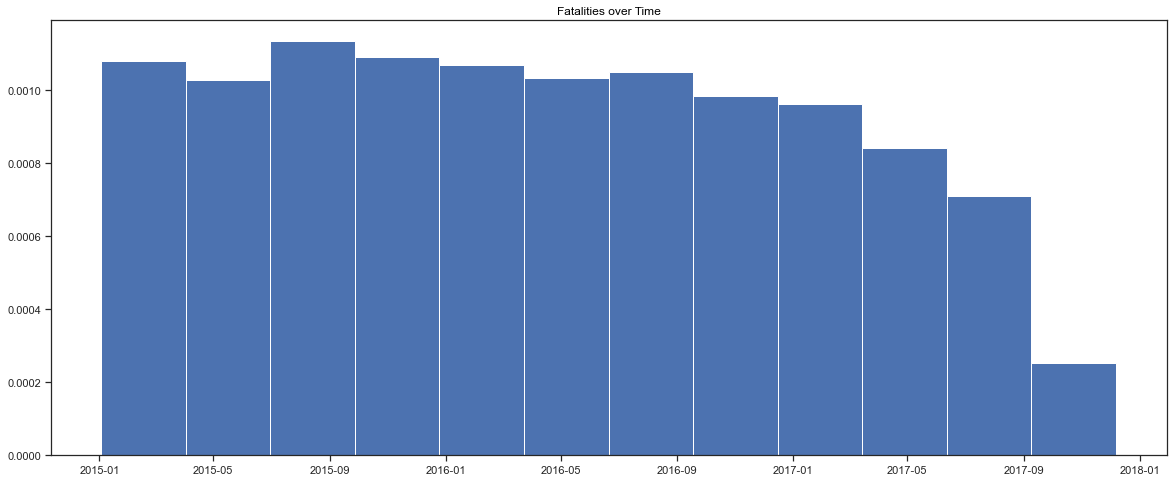

In [777]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.hist(df_fatalities_time['date'], bins=12, density=True)
plt.title('Fatalities over Time', color='black')
plt.setp(ax1.get_xticklabels(), rotation=45, color='black')
plt.show()